In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
insurance = pd.read_csv('insurance.csv')

In [5]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
insurance['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [7]:
insurance['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [9]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [13]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [18]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [20]:
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [21]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [22]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [27]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8583.8682 - mae: 8583.8682  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7621.5718 - mae: 7621.5718
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7574.4658 - mae: 7574.4658 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7534.4219 - mae: 7534.4219
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7789.7114 - mae: 7789.7114
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7497.6270 - mae: 7497.6270
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7523.3926 - mae: 7523.3926
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7648.1948 - mae: 7648.1948
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7773.8682 - mae: 7773.8682
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7797.1943 - mae: 7797.1943
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7532.8638 - mae: 7532.8638
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st

In [28]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6507.6182 - mae: 6507.6182 


[6507.6181640625, 6507.6181640625]

In [29]:
y_train.median(), y_train.mean()

(np.float64(9575.4421), np.float64(13346.089736364485))

In [30]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 13290.6533 - mae: 13290.6533
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13115.9961 - mae: 13115.9961
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12742.7686 - mae: 12742.7686
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12009.8701 - mae: 12009.8701
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10807.1865 - mae: 10807.1865
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9341.7402 - mae: 9341.7402
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8071.3120 - mae: 8071.3120
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7513.9966 - mae: 7513.9966
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7435.5659 - mae: 7435.5659
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7412.6772 - mae: 7412.6772
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7392.0264 - mae: 7392.0264
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [31]:
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4710.8213 - mae: 4710.8213 


[4710.8212890625, 4710.8212890625]

In [32]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6507.6182 - mae: 6507.6182 


[6507.6181640625, 6507.6181640625]

In [33]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 13300.7979 - mae: 13300.7979
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13126.9502 - mae: 13126.9502
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12769.5801 - mae: 12769.5801
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12071.6660 - mae: 12071.6660
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10903.1855 - mae: 10903.1855
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9434.6611 - mae: 9434.6611 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8109.9204 - mae: 8109.9204
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7510.5059 - mae: 7510.5059
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7425.6797 - mae: 7425.6797
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7402.3374 - mae: 7402.3374
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7381.7666 - mae: 7381.7666
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [34]:
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3400.8567 - mae: 3400.8567 


[3400.856689453125, 3400.856689453125]

In [35]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6507.6182 - mae: 6507.6182 


[6507.6181640625, 6507.6181640625]

Text(0.5, 0, 'epochs')

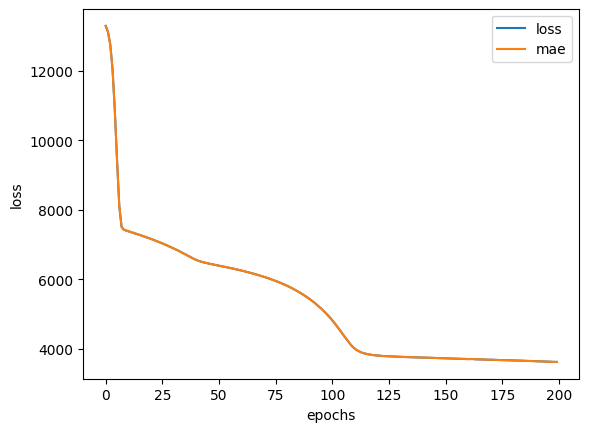

In [36]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [39]:
insurance = pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [41]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [43]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

X = insurance.drop('charges', axis=1)
y = insurance['charges']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [47]:
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [48]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [49]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [50]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [52]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 13342.4980 - mae: 13342.4980
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 13330.6299 - mae: 13330.6299
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 13302.7988 - mae: 13302.7988
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 13245.7910 - mae: 13245.7910
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 13147.3213 - mae: 13147.3213
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 12996.9854 - mae: 12996.9854
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12785.0889 - mae: 12785.0889
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12502.1367 - mae: 12502.1367
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12139.1602 - mae: 12139.1602
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11698.4697 - mae: 11698.4697
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 11202.2412 - mae: 11202.2412
Epoch 12/100
34/34 ━━━━━

In [54]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3427.3723 - mae: 3427.3723 


[3427.372314453125, 3427.372314453125]

In [51]:
insurance_model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)